In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("01-Ad.csv")

In [34]:
df.head()

,UserID,Gender,Type,Age,EstimatedSalary,Purchased
0,1,Male,B,24,2800000,0
1,2,Male,A,48,3000000,0
2,3,Female,B,34,7800000,0
3,4,Female,B,36,10700000,0
4,5,Male,D,24,14700000,0


# ======Preprocessing=======

In [36]:
x = df.iloc[:,3:5].values
y = df.iloc[:,-1].values #sotune akhar ke hamoon targete ma hast


In [37]:
#K-Fold corssvalidation
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True)
#cv crossvalidation
#yaeni tedade fold ha bashe 5 va tasadofi ham bashe
#shuffle nazani emkan dare eshtebah beshe hame range haro shamel beshe




In [ ]:
for train_index,test_index in cv.split(x):
    #yaeni bia x ro begir ba tavajoh be x split kon
    


In [5]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# =====Building model======

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)
#bayad dasti beri dakhele model bezani probability = true annars default False hast

In [28]:
print(y_pred)

[0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0]


In [13]:
print(model.coef_)
print(model.intercept_)

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9


In [30]:
#hala confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59  5]
 [ 5 31]]


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5659722222222222

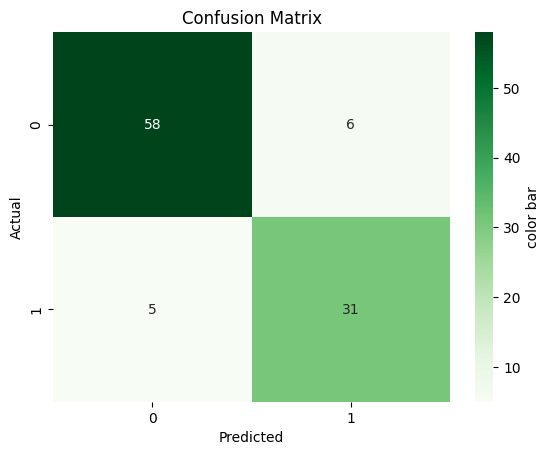

In [17]:
labels_order = [0,1]
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"label":"color bar","orientation":"vertical"},
            xticklabels=labels_order,yticklabels=labels_order
            )
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

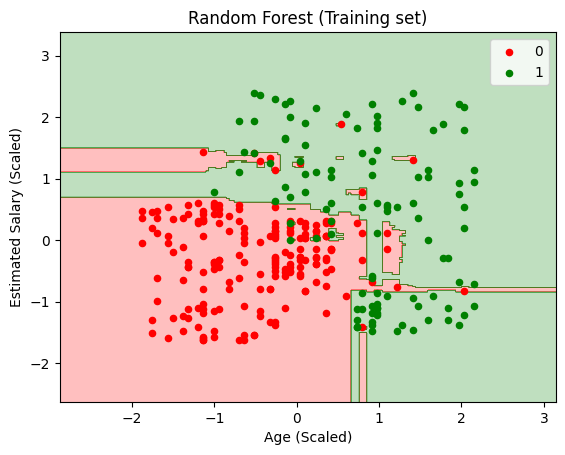

In [18]:
model_name="Random Forest"
is_scaled=True

# --- train
from matplotlib.colors import ListedColormap
cmap=ListedColormap(["red","green"])

x_set,y_set=x_train,y_train

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=cmap)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], s=20, color=cmap(i), label=j)
plt.title(f"{model_name} (Training set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()

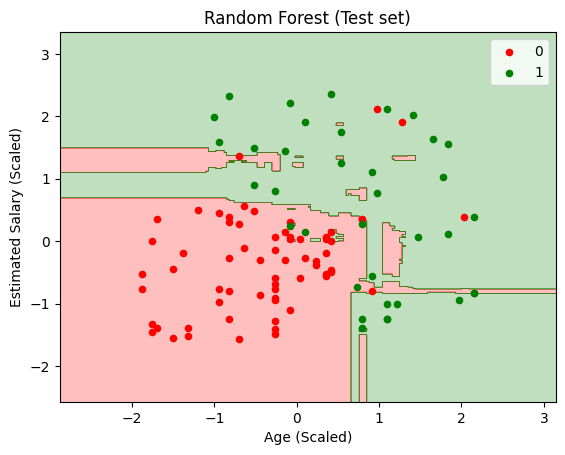

In [19]:
cmap=ListedColormap(["red","green"])

x_set,y_set=x_test,y_test

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=cmap)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], s=20, color=cmap(i), label=j)
plt.title(f"{model_name} (Test set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()


# ====Comparing=====

In [20]:
# --- f1
from sklearn.metrics import f1_score
f1=f1_score(y_true=y_test,y_pred=y_pred,labels=labels_order)
print(f"f1: {f1}")

f1: 0.8493150684931506


In [21]:
# --- AUC
y_pred_prob=model.predict_proba(x_test)

from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_true=y_test,y_score=y_pred_prob[:,1],labels=labels_order)
print(f"AUC: {auc}")


AUC: 0.9331597222222222


In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.89
